In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


2024-01-03 11:06:34,167 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - mmdet.version=2.25.0
2024-01-03 11:06:34,168 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - 11.7
2024-01-03 11:06:34,168 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - GCC 9.4
2024-01-03 11:06:34.170 | DEBUG    | pigleg_cv:<module>:50 - DEVICE=None


1.12.0a0+8a1a93a True


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Wed Jan  3 11:06:34 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   37C    P8     9W / 250W |    113MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [6]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [7]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [9]:
# pip install mmcv-full
!pip install pyinstrument

# Select video

In [18]:
is_microsurgery = False
test_first_seconds=False
n_stitches = 3
use_application_outputdir = True

patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
# patch = "Einzel.MOV"
patch = "test_4.mp4"; n_stitches=0
# patch = "Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu_"; n_stitches=0
# patch = "micro_01*.mp4"
# patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"; n_stitches=5
# patch = "Katharina_Einzelknopfnaht"; n_stitches=3


img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
mediafile_path = img_pths[0]


# original outputdir
if use_application_outputdir:
    outputdir = list(list(Path("../piglegsurgeryweb/media/").glob(f"*/*{patch}*.zip"))[0].parent.glob("*/meta.json"))[0].parent
    outputdir = outputdir.absolute().resolve()
    outputdir
else:
    outputdir = Path("./del_test_video_output/") / mediafile_path.name


## Do initial processing (including tracking)


In [11]:
dcv = pigleg_cv.DoComputerVision(mediafile_path, outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
dcv._run_tracking

dcv._make_sure_media_is_cropped()

dcv.run_image_processing()
dcv.meta["is_microsurgery"] = dcv.is_microsurgery
dcv.meta["n_stitches_by_user"] = dcv.n_stitches
dcv._run_tracking()
dcv._find_stitch_ends_in_tracks(
    n_clusters=dcv.n_stitches,
    plot_clusters=True,
    clusters_image_path=dcv.outputdir / "_stitch_clusters.jpg",
)

# dcv.run()

2024-01-03 11:07:12.150 | DEBUG    | pigleg_cv:__init__:97 - ###############
2024-01-03 11:07:12.151 | DEBUG    | pigleg_cv:__init__:98 - device=cuda
2024-01-03 11:07:12.152 | DEBUG    | pigleg_cv:__init__:99 - test_first_seconds=False
2024-01-03 11:07:12.152 | DEBUG    | pigleg_cv:__init__:100 - is_microsurgery=False
2024-01-03 11:07:12.153 | DEBUG    | pigleg_cv:__init__:123 - self.is_microsurgery=False
2024-01-03 11:07:12.153 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:372 - device=cuda
2024-01-03 11:07:12.214 | DEBUG    | run_perpendicular:get_frame_to_process:174 - 152
/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2024-01-03 11:07:14.930 | DEBUG    | run_qr:get_bboxes:71 - [[     404.94      158.85      542.06      293.96     0.99621]
 [     1111.7      165.

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-03 11:07:15,934 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2024-01-03 11:07:15.936 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:388 - {'bbox_micro_calibration': [],
 'bbox_scene_area': [237.48178100585938,
                     1.596093773841858,
                     1683.503662109375,
                     1080.0,
                     0.6937738060951233],
 'box': [[410, 287], [532, 286], [535, 164], [411, 164]],
 'incision_bboxes': [[774.2468872070312,
                      706.2264404296875,
                      1064.2303466796875,
                      784.9982299804688,
                      0.9780232310295105]],
 'incision_bboxes_old': [[763.6923828125,
                          683.0553588867188,
                          1078.682861328125,
                          798.51025390625,
                          0.9964717626571655]],
 'is_detected': True,
 'is_microsurgery': False,
 'pix_size': 0.00

Fusing layers... 
IDetect.fuse


2024-01-03 11:07:17.357 | DEBUG    | run_qr:get_bboxes:31 - saving single_image_detector result
2024-01-03 11:07:17.446 | DEBUG    | run_qr:get_bboxes:71 - [[     84.105      79.254      152.85      146.38     0.99502]
 [     437.69      80.951      506.46      154.33      0.9946]
 [     7.0066      24.368      688.74      517.73    0.069366]]
2024-01-03 11:07:17.448 | DEBUG    | tools:sort_bboxes_and_masks_by_confidence:204 - sorted_indices=array([0, 1]), int64
2024-01-03 11:07:17.586 | DEBUG    | run_qr:bbox_info_extraction_from_frame:125 - qr code text = 'Scissors 30 mm'
2024-01-03 11:07:17.587 | DEBUG    | run_qr:bbox_info_extraction_from_frame:125 - qr code text = 'Resolution 30 mm'
2024-01-03 11:07:17.588 | DEBUG    | run_qr:bbox_info_extraction_from_frame:211 - {'is_microsurgery': False, 'pix_size_method': 'QR', 'is_detected': True, 'box': [[439, 149], [500, 150], [504, 86], [441, 85]], 'pix_size': 0.0004917372071790321, 'incision_bboxes': [[270.1793518066406, 352.0786437988281,

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-03 11:07:18,327 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2024-01-03 11:07:18.329 | DEBUG    | run_perpendicular:main_perpendicular:335 - len(imgs)=1
2024-01-03 11:07:18.381 | DEBUG    | tools:save_json:16 - Writing 'del_test_video_output/pigleg_test_4.mp4/perpendicular_0.json'
2024-01-03 11:07:18.389 | DEBUG    | tools:save_json:27 - updated keys: ['intersections', 'alphas']
2024-01-03 11:07:18,822 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - cfg_path=PosixPath('stitch_detection_mmdet_config.py'), True
2024-01-03 11:07:18,823 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - checkpoint_path=PosixPath('/webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth'), True


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2024-01-03 11:07:19.501 | DEBUG    | tools:save_json:16 - Writing 'del_test_video_output/pigleg_test_4.mp4/stitch_detection_0.json'
2024-01-03 11:07:19.502 | DEBUG    | tools:save_json:27 - updated keys: ['stitch_labels', 'stitch_bboxes']
2024-01-03 11:07:19,503 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - number of detected stitches = 5
2024-01-03 11:07:19,503 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - Stitch detection finished, boxes in: del_test_video_output/pigleg_test_4.mp4/stitch_detection_0.json
2024-01-03 11:07:19,708 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared upper line: 0.891
2024-01-03 11:07:19,709 - /webapps/piglegsurgery/piglegcv/stitc

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2024-01-03 11:07:29,084 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2024-01-03 11:07:29,108 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2024-01-03 11:07:29,109 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-03 11:07:29,109 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-03 11:07:29,320 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth


2024-01-03 11:07:30.231 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:150 - Tracking on frame 0, 0.00% (0.02s elapsed, 1000.00s remaining)


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2024-01-03 11:07:40.475 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:150 - Tracking on frame 50, 52.63% (10.26s elapsed, 9.24s remaining)


[]

In [12]:
## deterministic profiles
# from cProfile import Profile
# from pstats import SortKey, Stats
# with Profile() as profile:
#     dcv._make_report(cut_frames=dcv.meta["stitch_split_frames"])(
#         Stats(profile)
#         .strip_dirs()
#         .sort_stats(SortKey.CALLS)
#         .print_stats()
#     )



Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 11.0 MB/s eta 0:00:00
DEPRECATION: torch-tensorrt 1.1.0a0 has a non-standard dependency specifier torch>=1.10.0+cu113<1.11.0. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


2024-01-03 11:11:02.294 | DEBUG    | run_report:main_report:952 - is_microsurgery=False, cut_frames=[]
2024-01-03 11:11:02.303 | DEBUG    | run_report:main_report:1055 - size_input_video: [720, 536], size_output_video: [1119, 420], size_output_img: [564, 420], resize_factor: 0.7835820895522388
2024-01-03 11:11:02.306 | DEBUG    | run_report:main_report:1070 - MMpose data M=
2024-01-03 11:11:02.308 | DEBUG    | run_report:bboxes_to_points:726 - Sort data N=95
2024-01-03 11:11:02.309 | DEBUG    | run_report:bboxes_to_points:727 - data_pixels=[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
2024-01-03 11:11:02.316 | DEBUG    | tools:save_json:16 - Writing 'del_test_video_output/pigleg_test_4.mp4/tracks_points.json'
2024-01-03 11:11:02.317 | DEBUG    | tools:save_json:27 - updated keys: ['frame_ids', 'data_pixels']
2024-01-03 11:11:02.321 | DEBUG    | run_report:create_video_report_figure:536 - cut_frames=[]
2024-01-03 11:11:02.322 | DEBUG    | run_report:create_video_report_fi

8402.141494988464


2024-01-03 11:11:04.308 | DEBUG    | run_report:main_report:1129 - Report on frame 50 done, 52.63% (2.01s elapsed, 1.80s remaining)
2024-01-03 11:11:05.988 | DEBUG    | run_report:main_report:1212 - pix_size=0.0004575163398692811
2024-01-03 11:11:05.989 | DEBUG    | run_report:main_report:1213 - frameshape=(420, 1119, 3)
2024-01-03 11:11:05.990 | DEBUG    | run_report:main_report:1214 - confidence_score_thr=0.0
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig

bbox
[188.2260284423828, 312.6870880126953, 494.07154846191406, 422.57447814941406, 0.9969307780265808]


2024-01-03 11:11:07.162 | DEBUG    | run_report:main_report:1248 - per stitch analysis object_full_name='Forceps' frame_idx_start=0 frame_idx_stop=4
2024-01-03 11:11:07.381 | DEBUG    | run_report:create_pdf_report_for_one_tool:332 - main_report: figures del_test_video_output/pigleg_test_4.mp4/graph_1c_forceps_trajectory_all.jpg is saved
2024-01-03 11:11:07.584 | DEBUG    | run_report:create_pdf_report_for_one_tool:361 - main_report: figures del_test_video_output/pigleg_test_4.mp4/fig_1a_forceps_graph_all.jpg is saved
2024-01-03 11:11:07.591 | DEBUG    | run_report:create_heatmap_report_plt:171 - points.shape=(4, 2)
/home/appuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2024-01-03 11:11:07.748 | DEBUG    | run_report:main_report:1248 - per stitch analysis object_full_name='Scissors' frame_idx_start=0 frame_idx_stop=61
2024-01-03 11:11:07.970 | DEBUG    | run_report:cr

main_report: Video file del_test_video_output/pigleg_test_4.mp4/__cropped.mp4 is processed!


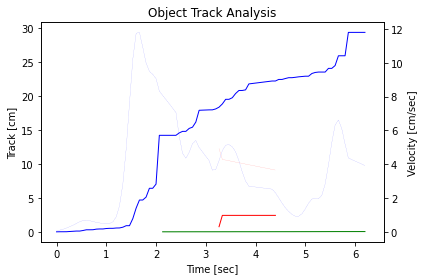

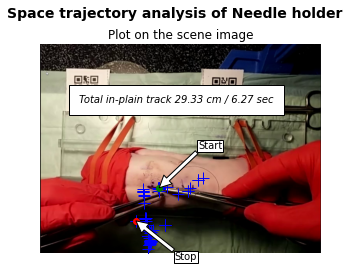

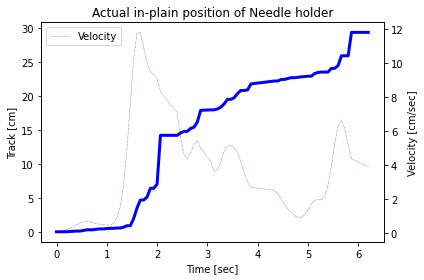

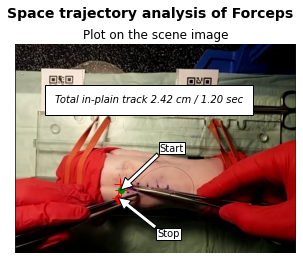

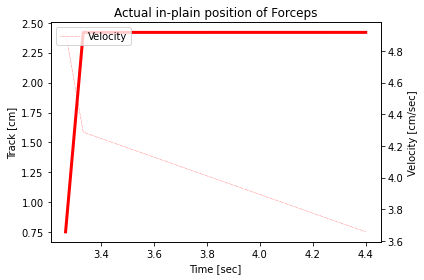

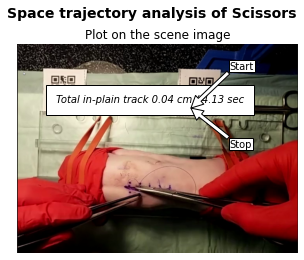

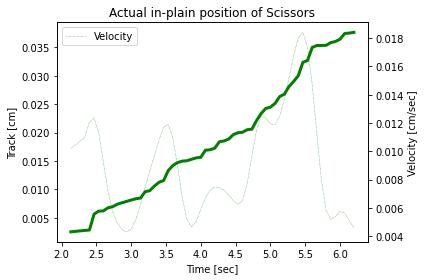

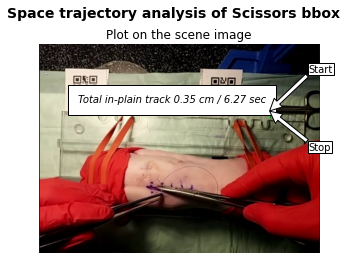

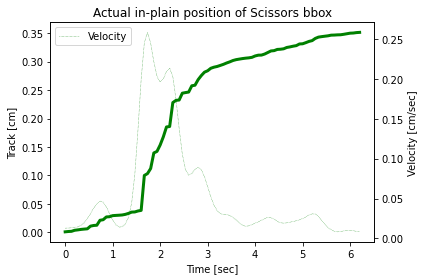

In [16]:
from pyinstrument import Profiler
with Profiler(interval=0.02) as profiler:
    dcv._make_report(cut_frames=dcv.meta["stitch_split_frames"])

In [35]:
profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 00:19:17  Samples:  355
 /_//_/// /_\ / //_// / //_'/ //     Duration: 10.830    CPU time: 9.212
/   _/                      v4.6.1

Program: /opt/conda/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/appuser/.local/share/jupyter/runtime/kernel-f704adcb-7f3f-42c6-9361-10e73b240a0b.json

10.810 <cell line: 2>  ../../../tmp/ipykernel_505/356217478.py:2
└─ 10.810 DoComputerVision._make_report  pigleg_cv.py:529
   └─ 10.810 main_report  run_report.py:906
      ├─ 2.925 plot3  run_report.py:500
      │  └─ 2.905 Figure.savefig  matplotlib/figure.py:2923
      │        [38 frames hidden]  matplotlib
      ├─ 2.485 system  <built-in>
      ├─ 1.866 create_pdf_report_for_one_tool  run_report.py:219
      │  ├─ 1.255 savefig  matplotlib/pyplot.py:976
      │  │     [34 frames hidden]  matplotlib, <built-in>, PIL
      │  ├─ 0.222 Figure.tight_layout  matplotlib/figure.py:3189
      │  │     [6 frames hidden]  matplotlib
      │  └─ 0.12

In [29]:
# with skimage.transform.resize
profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 00:03:00  Samples:  701
 /_//_/// /_\ / //_// / //_'/ //     Duration: 16.762    CPU time: 26.226
/   _/                      v4.6.1

Program: /opt/conda/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/appuser/.local/share/jupyter/runtime/kernel-f704adcb-7f3f-42c6-9361-10e73b240a0b.json

16.754 <cell line: 2>  ../../../tmp/ipykernel_505/356217478.py:2
└─ 16.754 DoComputerVision._make_report  pigleg_cv.py:529
   └─ 16.754 main_report  run_report.py:906
      ├─ 6.859 resize  skimage/transform/_warps.py:19
      │     [20 frames hidden]  skimage, <__array_function__ internal...
      │        5.271 warp  skimage/transform/_warps.py:684
      │        ├─ 3.970 [self]  skimage/transform/_warps.py
      ├─ 4.709 plot3  run_report.py:500
      │  └─ 4.709 Figure.savefig  matplotlib/figure.py:2923
      │        [44 frames hidden]  matplotlib
      ├─ 1.907 create_pdf_report_for_one_tool  run_report.py:219
      │  ├─ 1.359 savefig  m

In [30]:
profiler.open_in_browser()

'/tmp/tmpwg8lzr2x.html'

In [12]:
# report_data = dcv.make_report()